# **1) Extract reviews of any product from ecommerce website like amazon**
# **2) Perform emotion mining**

In [1]:
# import libraries

import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

# **Multi-page web-scraping**

In [2]:
headers = {"authority" : "www.amazon.in",
           "accept-language": "en-US, en;q=0.9",
           "referer" : "https://www.amazon.in/iQOO-MediaTek-Dimesity-Processor-Smartphone/dp/B07WGPJPR3/ref=sr_1_2_sspa?adgrpid=60924925370&dib=eyJ2IjoiMSJ9.2JdWYrwozinWFkym3445_Z8dQXZs46j-PK82BlI3ZO--f4zJM3kJyx4vozOCIYe4v588Pavg4rQ3gKapn3pL1MDRKYOt-7OyJHGBcvM8etO-V9pXnOtqyMzAjEj3-v1GEILnmQKVAFpEsLVRLmIz8QU4R7Hn6AynoPEAqux7-C9u2Qw-nVqsKt3BLcmhVZmFKGemRtT3tqi50-0ZqMqVXs6gDEZaTjrJA3IHGbQiFMo.4BiQyWXYvOMfrq--Dp1BXCJKR_OLBIoCx-0aeu_DhrA&dib_tag=se&ext_vrnc=hi&hvadid=590713723331&hvdev=c&hvlocphy=9148814&hvnetw=g&hvqmt=e&hvrand=17945578845075021388&hvtargid=kwd-1647452622699&hydadcr=24572_2265458&keywords=iqoo+z7+pro&qid=1717072418&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1",
           "user-agent" : "'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'"}

# **Looping through multiple pages**

In [3]:
def get_soup(url):
  r = requests.get(url, headers = headers,
  params = {"url" : url, "wait" : 2})
  soup = BeautifulSoup(r.text, "html.parser")
  return soup

In [4]:
reviewlist = []

def get_reviews(soup):
  reviews = soup.find_all("div", {"data-hook" : "review"})
  try:
    for item in reviews:
      review = {"Title" : item.find("a", {"data-hook" : "review-title"}).text.strip(),
                "Rating" : float(item.find("i", {"data-hook" : "review-star-rating"}).text.replace("out of 5 stars", "").strip()),
                "Review" : item.find("span", {"data-hook" : "review-body"}).text.strip(),
                "Review_Date" : item.find("span", {"data-hook" : "review-date"}).text.replace("Reviewed in India IN on", "Reviewed in India on").strip()}
      reviewlist.append(review)
  except:
    pass

In [5]:
for x in tqdm_notebook(range(160)):

  soup = get_soup(f"https://www.amazon.in/iQOO-MediaTek-Dimesity-Processor-Smartphone/product-reviews/B07WGPJPR3/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
  get_reviews(soup)
  if not soup.find("li", {"class" : "a-disabled a-last"}):
    pass
  else:
    break

  0%|          | 0/160 [00:00<?, ?it/s]

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBEST VALUE FOR MONEY 5G PH...,5.0,"After using this phn for past 3 months, I am w...",Reviewed in India on 9 December 2023
1,4.0 out of 5 stars\nnice phone with little issue,4.0,The iQOO Z6 Pro is impressive in many ways. It...,Reviewed in India on 21 April 2024
2,5.0 out of 5 stars\nFabulous device,5.0,Writing this Review from iqoo z7pro after usin...,Reviewed in India on 24 May 2024
3,5.0 out of 5 stars\nThe phone is awesome,5.0,"Just recieved the phone , was a bit skeptical ...",Reviewed in India on 10 May 2024
4,5.0 out of 5 stars\nDelevery Experience bad bu...,5.0,Delevery Experience bad But Product is best an...,Reviewed in India on 8 May 2024
...,...,...,...,...
1595,4.0 out of 5 stars\nA good device with less co...,4.0,After using the device for exactly 7 days here...,Reviewed in India on 9 September 2023
1596,5.0 out of 5 stars\nAwesome phone,5.0,Nice cameraHigh speed charger,Reviewed in India on 29 May 2024
1597,4.0 out of 5 stars\nA good money for value pho...,4.0,It's been 3 weeks since I bought this phone an...,Reviewed in India on 17 October 2023
1598,4.0 out of 5 stars\nA good daily use phone,4.0,"It's been only a month, no issues were found, ...",Reviewed in India on 29 May 2024


In [7]:
df["Review_Date"] = df["Review_Date"].replace("Reviewed in India on", "", regex = True)

In [8]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBEST VALUE FOR MONEY 5G PH...,5.0,"After using this phn for past 3 months, I am w...",9 December 2023
1,4.0 out of 5 stars\nnice phone with little issue,4.0,The iQOO Z6 Pro is impressive in many ways. It...,21 April 2024
2,5.0 out of 5 stars\nFabulous device,5.0,Writing this Review from iqoo z7pro after usin...,24 May 2024
3,5.0 out of 5 stars\nThe phone is awesome,5.0,"Just recieved the phone , was a bit skeptical ...",10 May 2024
4,5.0 out of 5 stars\nDelevery Experience bad bu...,5.0,Delevery Experience bad But Product is best an...,8 May 2024
5,4.0 out of 5 stars\nA good device with less co...,4.0,After using the device for exactly 7 days here...,9 September 2023
6,5.0 out of 5 stars\nAwesome phone,5.0,Nice cameraHigh speed charger,29 May 2024
7,4.0 out of 5 stars\nA good money for value pho...,4.0,It's been 3 weeks since I bought this phone an...,17 October 2023
8,4.0 out of 5 stars\nA good daily use phone,4.0,"It's been only a month, no issues were found, ...",29 May 2024
9,4.0 out of 5 stars\nWriting the 1st impression...,4.0,Camera : GoodDisplay : AmazingBattery : Decent...,28 April 2024


In [9]:
df.to_csv("Review.csv")

# **Load Dataset**

In [10]:
reviews = pd.read_csv("Review.csv")
reviews.drop(["Unnamed: 0"], inplace = True, axis = 1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBEST VALUE FOR MONEY 5G PH...,5.0,"After using this phn for past 3 months, I am w...",9 December 2023
1,4.0 out of 5 stars\nnice phone with little issue,4.0,The iQOO Z6 Pro is impressive in many ways. It...,21 April 2024
2,5.0 out of 5 stars\nFabulous device,5.0,Writing this Review from iqoo z7pro after usin...,24 May 2024
3,5.0 out of 5 stars\nThe phone is awesome,5.0,"Just recieved the phone , was a bit skeptical ...",10 May 2024
4,5.0 out of 5 stars\nDelevery Experience bad bu...,5.0,Delevery Experience bad But Product is best an...,8 May 2024
...,...,...,...,...
1595,4.0 out of 5 stars\nA good device with less co...,4.0,After using the device for exactly 7 days here...,9 September 2023
1596,5.0 out of 5 stars\nAwesome phone,5.0,Nice cameraHigh speed charger,29 May 2024
1597,4.0 out of 5 stars\nA good money for value pho...,4.0,It's been 3 weeks since I bought this phone an...,17 October 2023
1598,4.0 out of 5 stars\nA good daily use phone,4.0,"It's been only a month, no issues were found, ...",29 May 2024


# **Data Exploration**

In [11]:
reviews.Rating.describe()

count    1600.000000
mean        4.500000
std         0.500156
min         4.000000
25%         4.000000
50%         4.500000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1600 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [13]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [14]:
reviews.dropna(subset=["Review"],inplace = True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nBEST VALUE FOR MONEY 5G PH...,5.0,"After using this phn for past 3 months, I am w...",9 December 2023
1,4.0 out of 5 stars\nnice phone with little issue,4.0,The iQOO Z6 Pro is impressive in many ways. It...,21 April 2024
2,5.0 out of 5 stars\nFabulous device,5.0,Writing this Review from iqoo z7pro after usin...,24 May 2024
3,5.0 out of 5 stars\nThe phone is awesome,5.0,"Just recieved the phone , was a bit skeptical ...",10 May 2024
4,5.0 out of 5 stars\nDelevery Experience bad bu...,5.0,Delevery Experience bad But Product is best an...,8 May 2024


# **Data Visualization**

# Date vs Review Count

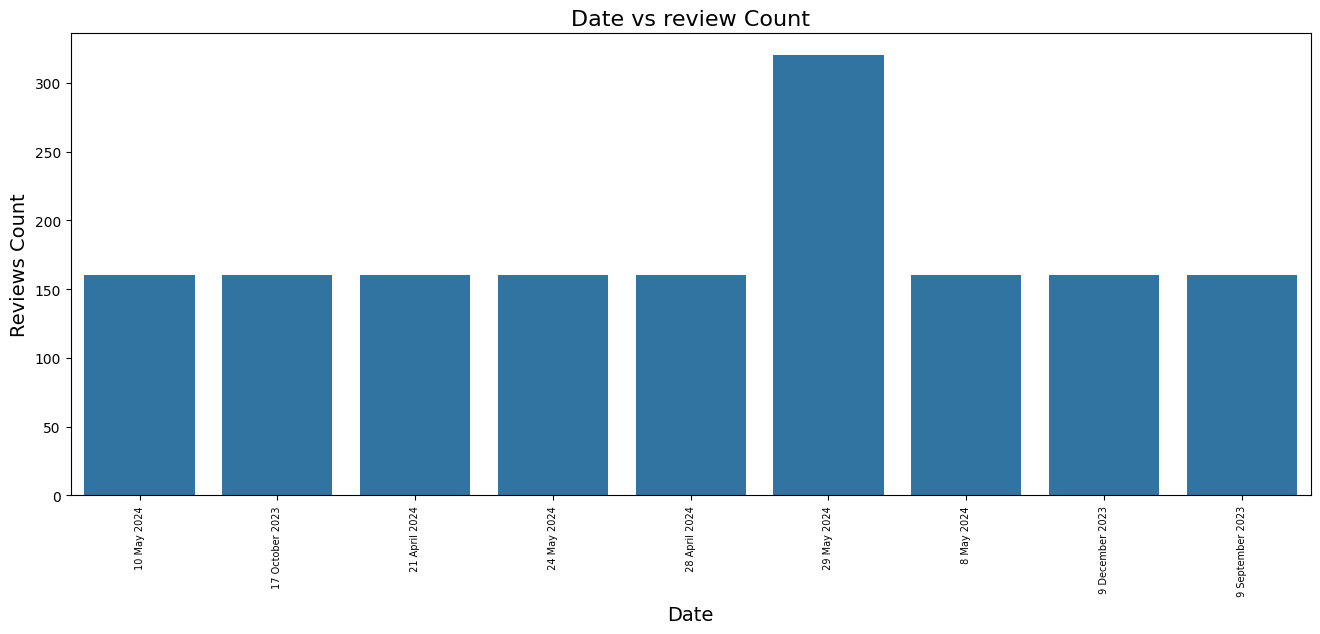

In [15]:
# Creating a Dataframe
dayreview = pd.DataFrame(reviews.groupby("Review_Date")["Review"].count()).reset_index()
dayreview["Date"] = dayreview["Review_Date"]
dayreview.sort_values(by = ["Review_Date"])

# Plotting the graph
plt.figure(figsize = (16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title("Date vs review Count", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 7)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Reviews Count", fontsize = 14)
plt.show()

# **Percentage of Ratings**

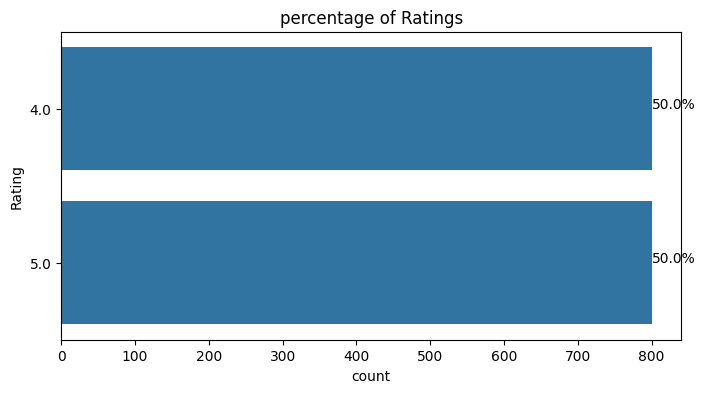

In [16]:
plt.figure(figsize = (8,4))
plt.title("percentage of Ratings")
ax = sns.countplot(y = "Rating", data = reviews)
total = len(reviews)
for p in ax.patches:
  percentage = "{:.1f}%".format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x, y))

# **BasicText Preprocessing for Sentiment Analysis**

In [17]:
iqoo_review = reviews[["Review"]]
iqoo_review

,Review
0,"After using this phn for past 3 months, I am w..."
1,The iQOO Z6 Pro is impressive in many ways. It...
2,Writing this Review from iqoo z7pro after usin...
3,"Just recieved the phone , was a bit skeptical ..."
4,Delevery Experience bad But Product is best an...
...,...
1595,After using the device for exactly 7 days here...
1596,Nice cameraHigh speed charger
1597,It's been 3 weeks since I bought this phone an...
1598,"It's been only a month, no issues were found, ..."


# **Resetting Index**

In [18]:
iqoo_review.reset_index(drop = True, inplace = True)

In [19]:
import nltk
from nltk.corpus import stopwords

In [20]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop_words = stopwords.words("english")
iqoo_review["Review"] = iqoo_review["Review"].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# **Lemmatizer**

In [22]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(iqoo_review))):
  cleaned = re.sub("[^a-zA-Z]", " ", iqoo_review["Review"][i])
  cleaned = cleaned.lower()
  cleaned = cleaned.split()
  cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
  cleaned = " ".join(cleaned)
  corpus.append(cleaned)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [24]:
# Saving cleaned data to compare with original data, to check amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus, "Uncleaned_Reviews": iqoo_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...


# **Text Pre-Processing Techniques**

# **Removing"@names"**

In [25]:
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i, " ",text)

  return text

In [26]:
# we are keeping cleaned reviews in new column called "tidy_reviews"
dataframe["Clean_Reviews"] = np.vectorize(remove_pattern)(dataframe["Clean_Reviews"], "@[\w]*")
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...


# **Removing links (http | https)**

In [27]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
  words_without_links = [word for word in row.Clean_Reviews.split() if "http" not in word]
  cleaned_reviews.append(" ".join(words_without_links))

dataframe["Clean_Reviews"] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...
5,using device exactly day found starting first ...,after using device exactly 7 days here's i fou...
6,nice camerahigh speed charger,nice camerahigh speed charger
7,week since bought phone loving many doubt buyi...,it's 3 weeks since i bought phone i loving it....
8,month issue found camera nice like gcam output...,"it's month, issues found, camera nice i like g..."
9,camera gooddisplay amazingbattery decentsound ...,camera : gooddisplay : amazingbattery : decent...


# **Removing Review with empty text**

In [28]:
dataframe = dataframe[dataframe["Clean_Reviews"]!=""]
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...
5,using device exactly day found starting first ...,after using device exactly 7 days here's i fou...
6,nice camerahigh speed charger,nice camerahigh speed charger
7,week since bought phone loving many doubt buyi...,it's 3 weeks since i bought phone i loving it....
8,month issue found camera nice like gcam output...,"it's month, issues found, camera nice i like g..."
9,camera gooddisplay amazingbattery decentsound ...,camera : gooddisplay : amazingbattery : decent...


# **Dropping duplicate rows**

In [29]:
dataframe.drop_duplicates(subset = ["Clean_Reviews"], keep = False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...
5,using device exactly day found starting first ...,after using device exactly 7 days here's i fou...
6,nice camerahigh speed charger,nice camerahigh speed charger
7,week since bought phone loving many doubt buyi...,it's 3 weeks since i bought phone i loving it....
8,month issue found camera nice like gcam output...,"it's month, issues found, camera nice i like g..."
9,camera gooddisplay amazingbattery decentsound ...,camera : gooddisplay : amazingbattery : decent...


# **Function to remove emoji**

In [30]:
def remove_emoji(text):
  emoji_pattern = re.compile("["
                          u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  return emoji_pattern.sub(r"", text)

In [31]:
dataframe["Clean_Reviews"] = dataframe["Clean_Reviews"].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...
5,using device exactly day found starting first ...,after using device exactly 7 days here's i fou...
6,nice camerahigh speed charger,nice camerahigh speed charger
7,week since bought phone loving many doubt buyi...,it's 3 weeks since i bought phone i loving it....
8,month issue found camera nice like gcam output...,"it's month, issues found, camera nice i like g..."
9,camera gooddisplay amazingbattery decentsound ...,camera : gooddisplay : amazingbattery : decent...


# **Tokenize "Clean_Reviews"**

In [32]:
TextBlob(dataframe["Clean_Reviews"][1]).words

WordList(['iqoo', 'z', 'pro', 'impressive', 'many', 'way', 'performance', 'top', 'notch', 'handling', 'apps', 'game', 'smoothly', 'camera', 'take', 'stunning', 'photo', 'video', 'capturing', 'every', 'moment', 'vividly', 'battery', 'life', 'great', 'lasting', 'day', 'heavy', 'use', 'design', 'sleek', 'modern', 'fitting', 'comfortably', 'hand', 'however', 'screen', 'feel', 'bit', 'slow', 'sometimes', 'frustrating', 'despite', 'drawback', 'phone', 'overall', 'performance', 'feature', 'make', 'solid', 'choice', 'anyone', 'looking', 'reliable', 'powerful', 'device'])

In [33]:
tokenized_review = dataframe["Clean_Reviews"].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, phn, past, month, writing, long, time,...
1    [iqoo, z, pro, impressive, many, way, performa...
2    [writing, review, iqoo, z, pro, using, three, ...
3    [recieved, phone, bit, skeptical, due, online,...
4    [delevery, experience, bad, product, best, upd...
5    [using, device, exactly, day, found, starting,...
6                   [nice, camerahigh, speed, charger]
7    [week, since, bought, phone, loving, many, dou...
8    [month, issue, found, camera, nice, like, gcam...
9    [camera, gooddisplay, amazingbattery, decentso...
Name: Clean_Reviews, dtype: object

In [34]:
dataframe["Tokenized_Review"] = dataframe["Clean_Reviews"].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Review
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ...","[using, phn, past, month, writing, long, time,..."
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...,"[iqoo, z, pro, impressive, many, way, performa..."
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...,"[writing, review, iqoo, z, pro, using, three, ..."
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online...","[recieved, phone, bit, skeptical, due, online,..."
4,delevery experience bad product best update co...,delevery experience bad but product best after...,"[delevery, experience, bad, product, best, upd..."
5,using device exactly day found starting first ...,after using device exactly 7 days here's i fou...,"[using, device, exactly, day, found, starting,..."
6,nice camerahigh speed charger,nice camerahigh speed charger,"[nice, camerahigh, speed, charger]"
7,week since bought phone loving many doubt buyi...,it's 3 weeks since i bought phone i loving it....,"[week, since, bought, phone, loving, many, dou..."
8,month issue found camera nice like gcam output...,"it's month, issues found, camera nice i like g...","[month, issue, found, camera, nice, like, gcam..."
9,camera gooddisplay amazingbattery decentsound ...,camera : gooddisplay : amazingbattery : decent...,"[camera, gooddisplay, amazingbattery, decentso..."


# **Converting Words to Stemmer**

In [35]:
stemmer = SnowballStemmer("english")

In [36]:
xx = pd.DataFrame()
xx["stemmed"] = dataframe["Clean_Reviews"].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use phn past month write long time rivew want ...
1,iqoo z pro impress mani way perform top notch ...
2,write review iqoo z pro use three day first le...
3,reciev phone bit skeptic due onlin review bega...
4,deleveri experi bad product best updat convert...
...,...
1595,use devic exact day found start first design b...
1596,nice camerahigh speed charger
1597,week sinc bought phone love mani doubt buy pho...
1598,month issu found camera nice like gcam output ...


# **Converting Words to Lemma**

In [37]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy["stemmed"] = dataframe["Clean_Reviews"].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,using phn past month writing long time rivew w...
1,iqoo z pro impressive many way performance top...
2,writing review iqoo z pro using three day firs...
3,recieved phone bit skeptical due online review...
4,delevery experience bad product best update co...
...,...
1595,using device exactly day found starting first ...
1596,nice camerahigh speed charger
1597,week since bought phone loving many doubt buyi...
1598,month issue found camera nice like gcam output...


# **Basic Feature Extaction**

# Applying bag of Words without N grams

In [38]:
cv = CountVectorizer()
reviewcv =cv.fit_transform(dataframe.Clean_Reviews)

In [39]:
print(cv.get_feature_names_out()[109:200])

['come' 'comfortable' 'comfortably' 'coming' 'comming' 'compared'
 'completely' 'compromise' 'con' 'concerned' 'conclusion' 'connectivity'
 'constant' 'consumption' 'convert' 'cool' 'cooling' 'corner' 'could'
 'count' 'country' 'crystal' 'cup' 'curve' 'curved' 'customization'
 'daily' 'darshitha' 'day' 'daylight' 'deal' 'decent' 'decentperformance'
 'decentsound' 'decided' 'decision' 'delevery' 'delivered' 'delivers'
 'department' 'design' 'despite' 'detection' 'device' 'diasbled'
 'different' 'dimensity' 'direct' 'display' 'disturb' 'dm' 'dna' 'done'
 'doubt' 'downloading' 'drawback' 'drop' 'dual' 'due' 'duel' 'earbuds'
 'earlier' 'easily' 'easy' 'edge' 'enabled' 'end' 'enough' 'equivalently'
 'etc' 'even' 'every' 'everyone' 'everything' 'everywhere' 'exactly'
 'except' 'exceptional' 'experience' 'extraordinary' 'eye' 'fabrication'
 'fabulous' 'faced' 'factor' 'fall' 'fan' 'far' 'fast' 'feature' 'feel']


In [40]:
print(cv.get_feature_names_out()[:100])

['acceptable' 'accodring' 'according' 'accordingly' 'across' 'actually'
 'ad' 'adaptor' 'advertisement' 'aggregation' 'ahead' 'almost' 'already'
 'alround' 'also' 'always' 'amazing' 'amazinga' 'amazingbattery' 'amazon'
 'amoled' 'android' 'angle' 'animation' 'annoying' 'anyone' 'appearance'
 'appreciated' 'apps' 'area' 'assure' 'attention' 'attractive' 'audio'
 'aura' 'auto' 'available' 'avarage' 'average' 'avoid' 'awesome' 'back'
 'backup' 'bad' 'balanced' 'barely' 'based' 'battery' 'beat' 'beautiful'
 'becomes' 'began' 'believe' 'best' 'better' 'bgmi' 'big' 'bigger' 'bit'
 'bloatware' 'bloatwares' 'blowing' 'blue' 'body' 'bother' 'bothered'
 'bottom' 'bought' 'box' 'brand' 'bright' 'brightness' 'browser' 'bug'
 'build' 'built' 'buttery' 'buy' 'buying' 'camera' 'camerahigh' 'capable'
 'capacity' 'capture' 'capturing' 'card' 'career' 'case' 'catching'
 'category' 'ce' 'center' 'chamber' 'charge' 'charger' 'charging'
 'checked' 'chipset' 'choice' 'choose']


In [41]:
print(reviewcv.toarray()[100:200])

[[1 1 0 ... 4 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# **CountVectorizer with N-grams (Bigrams & Trigrams)**

In [42]:
dataframe = dataframe.reset_index(drop = True)

In [43]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
  review = re.sub("[^a-zA-Z]", " ", dataframe["Clean_Reviews"][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [44]:
corpus[3]

'reciev phone bit skeptic due onlin review began differ perspect pretti much power yet easi handl awesom camera perform updat view come month use'

In [45]:
cv = CountVectorizer(max_features = 1546,ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [46]:
X.shape

(1600, 1546)

In [47]:
cv.get_feature_names_out()[:20]

array(['accept', 'actual', 'alreadi', 'also', 'alway', 'amaz', 'amazon',
       'amol', 'android', 'anim', 'anim fast', 'anim fast ui', 'anyon',
       'app', 'area', 'audio', 'aura', 'aura light', 'averag',
       'averag camera'], dtype=object)

In [48]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [49]:
count_df = pd.DataFrame(X, columns = cv.get_feature_names_out())
count_df

,accept,actual,alreadi,also,alway,amaz,amazon,amol,android,anim,...,youtub,youtub brand,youtub brand servic,youtub funtouch,youtub funtouch come,youtub netflix,youtub netflix amazon,youtub review,youtub review purchas,yr
0,1,2,2,10,2,0,2,5,0,2,...,5,1,1,1,1,2,2,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0,0,0,6,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **TF-IDF Vectorizer**

In [50]:
ps =PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
  review = re.sub("[^a-zA-Z]", " ", dataframe["Clean_Reviews"][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review)

  0%|          | 0/1600 [00:00<?, ?it/s]

In [51]:
corpus[4]

'deleveri experi bad product best updat convert android android game perform good highli recommend buy iqoo z pro'

# **Applying TF-IDF Vectorizer**

In [52]:
tfidf_v = TfidfVectorizer(max_features = 1546,ngram_range = (1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [53]:
X.shape

(1600, 1546)

In [54]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'actual', 'alreadi', 'also', 'alway', 'amaz', 'amazon',
       'amol', 'android', 'anim', 'anim fast', 'anim fast ui', 'anyon',
       'app', 'area', 'audio', 'aura', 'aura light', 'averag',
       'averag camera'], dtype=object)

In [55]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(X, columns = tfidf_v.get_feature_names_out())
count_df

,accept,actual,alreadi,also,alway,amaz,amazon,amol,android,anim,...,youtub,youtub brand,youtub brand servic,youtub funtouch,youtub funtouch come,youtub netflix,youtub netflix amazon,youtub review,youtub review purchas,yr
0,0.021103,0.042206,0.042206,0.166861,0.042206,0.000000,0.042206,0.083431,0.000000,0.033372,...,0.105514,0.021103,0.021103,0.021103,0.021103,0.042206,0.042206,0.021103,0.021103,0.021103
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.078896,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386722,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.000000,0.000000,0.000000,0.194218,0.000000,0.000000,0.000000,0.032370,0.032370,0.032370,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1596,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1598,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Named Entity Recognition (NER)**

In [57]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# joining the list into one string/text
reviews_text = " ".join(reviews)
reviews_text[0:2000]

'using phn past month writing long time rivew want buy phn k segment many option moto edge neo oneplus nord ce realme pro decent phone con upto top preference display camera processor coming iqoo z pro let count pro display inch beautiful curved amoled hz nit peak brightness screen bright punchy amoled color smooth animation fast ui lagging frame drop usage also hdr supported youtube netflix amazon everywhere moto edge neo also similar curved amoled small screen size inch support hz nit peak brightness punchy color science hdr supported youtube netflix amazon oneplus realme peak brightness nit nit respectively issue direct sunlight use nord ce flat amoled curved camera usually believe megapixels number need good rear main camera mp ois good front camera mp z pro give balanced picture attractive social medium ready picture best portrait mode picture best night mode picture price range yes ultrawide camera missing useless mp mp secondary camera main camera upto mark phone wife liked fron

# **Parts of Speech (POS) Tagging**

In [58]:
nlp = spacy.load("en_core_web_sm")

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = "ent", jupyter = True)

In [59]:
for token in doc_block[:50]:
  print(token,token.pos_)

using VERB
phn PRON
past ADJ
month NOUN
writing VERB
long ADJ
time NOUN
rivew ADV
want AUX
buy VERB
phn PROPN
k NOUN
segment NOUN
many ADJ
option NOUN
moto NOUN
edge NOUN
neo PROPN
oneplus PROPN
nord PROPN
ce PROPN
realme PROPN
pro ADJ
decent ADJ
phone NOUN
con NOUN
upto NOUN
top ADJ
preference PROPN
display NOUN
camera NOUN
processor NOUN
coming VERB
iqoo NOUN
z NOUN
pro X
let AUX
count VERB
pro ADJ
display NOUN
inch NOUN
beautiful ADJ
curved VERB
amoled VERB
hz PROPN
nit NOUN
peak NOUN
brightness NOUN
screen NOUN
bright ADJ


# **Filtering the nouns and verbs only**

In [60]:
nlp.max_length = 1587199
one_block = reviews_text
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN", "VERB")]
print(nouns_verbs[100:200])

['cup', 'tea', 'camera', 'eye', 'catching', 'portrait', 'mode', 'edge', 'detection', 'phone', 'iqoo', 'camera', 'quality', 'oneplus', 'megapixel', 'realize', 'seeing', 'mp', 'camera', 'realme', 'video', 'phone', 'max', 'support', 'upto', 'help', 'footage', 'iqoo', 'output', 'moto', 'saturated', 'colour', 'science', 'phone', 'camera', 'video', 'support', 'max', 'p', 'edge', 'support', 'choose', 'processor', 'dimensity', 'processor', 'help', 'gaming', 'battery', 'consumption', 'gamers', 'recommend', 'watch', 'youtube', 'review', 'purchasing', 'tested', 'game', 'use', 'faced', 'stuttering', 'heating', 'lagging', 'phone', 'enabled', 'keep', 'rate', 'auto', 'switch', 'processor', 'keep', 'phone', 'liquid', 'cooling', 'vapour', 'chamber', 'battery', 'charging', 'people', 'including', 'hesitated', 'battery', 'optimization', 'phone', 'beat', 'mah', 'phone', 'price', 'range', 'process', 'battery', 'backup', 'day', 'hour', 'screen', 'time', 'use', 'user', 'day', 'hr', 'sot']


# **Counting the Noun & Verb Tokens**

In [61]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis = 0)

words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ["word", "count"]
wd_df[0:10]

,word,count
0,phone,7360
1,camera,5120
2,iqoo,2880
3,battery,2560
4,device,1920
5,edge,1600
6,coming,1600
7,use,1600
8,speaker,1600
9,price,1440


# **Visualizing results (Barchart for top 10 nouns + verbs)**

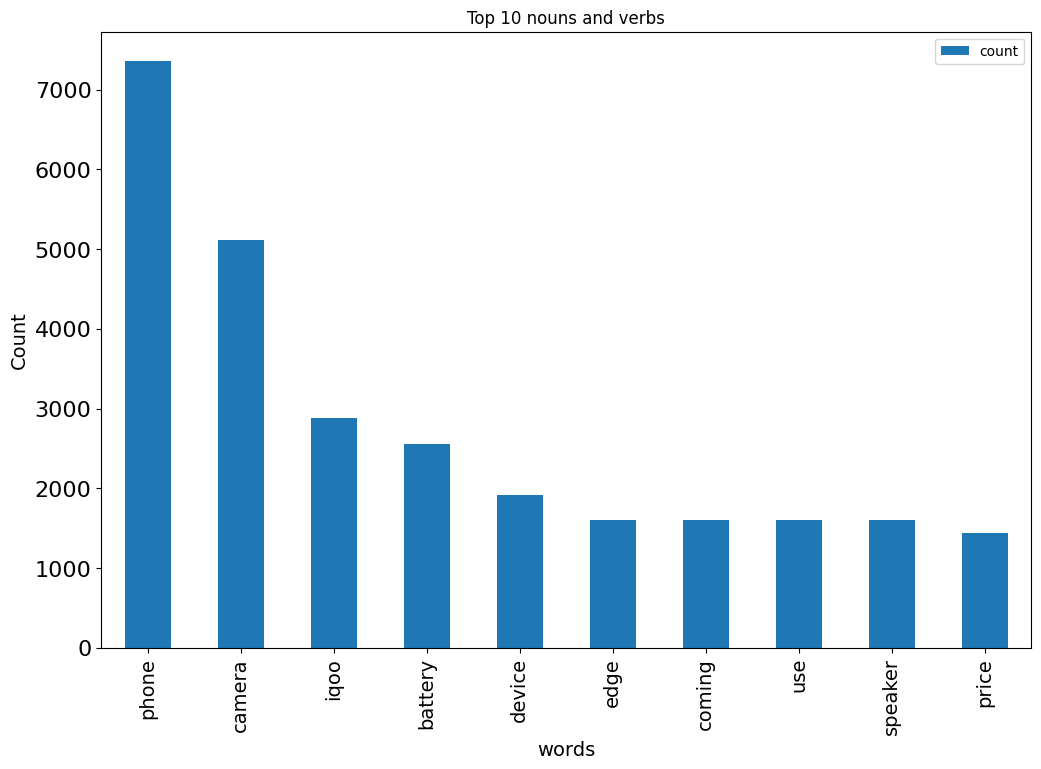

In [62]:
wd_df[0:10].plot.bar(x = "word", figsize = (12,8), title = "Top 10 nouns and verbs", fontsize = 16)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel("words", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

# **Feature Extraction**

# BOW Features

In [63]:
bow_word_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, stop_words = "english")
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe["Clean_Reviews"])

# TF-IDF Features

In [64]:
tfidf_word_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, stop_words = "english")
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe["Clean_Reviews"])

# **Fetch Sentiments Using TextBlob**

In [88]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return "pos" if analysis.sentiment.polarity >= 0 else "neg"

In [89]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,1600


# **Let's calculate subjectivity and Polarity**

In [83]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe["Subjectivity"] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe["Polarity"] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Review,Subjectivity,Polarity
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ...","[using, phn, past, month, writing, long, time,...",0.483410,0.216049
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...,"[iqoo, z, pro, impressive, many, way, performa...",0.550000,0.218056
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...,"[writing, review, iqoo, z, pro, using, three, ...",0.667857,0.296429
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online...","[recieved, phone, bit, skeptical, due, online,...",0.758333,0.194048
4,delevery experience bad product best update co...,delevery experience bad but product best after...,"[delevery, experience, bad, product, best, upd...",0.526667,0.290000


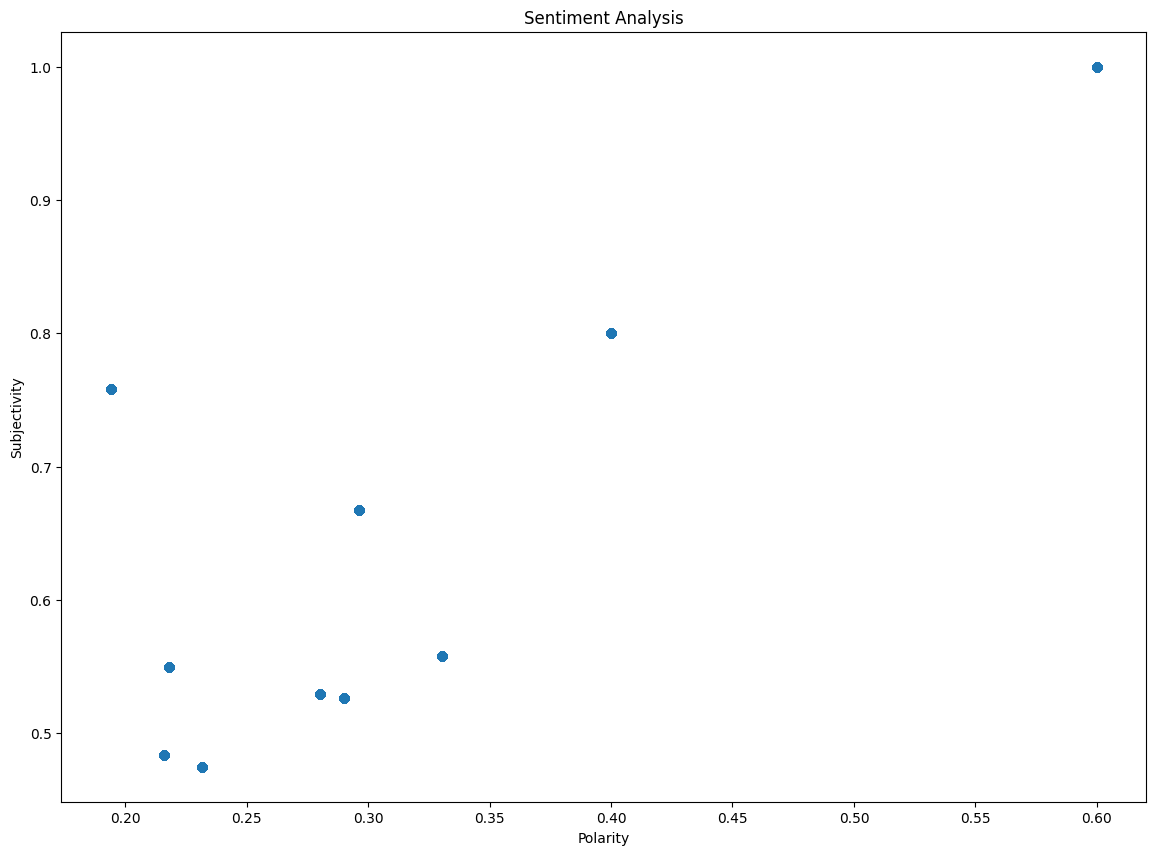

In [86]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity");

In [90]:
dataframe["sentiment"] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv", index = False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Review,Subjectivity,Polarity,sentiment
0,using phn past month writing long time rivew w...,"after using phn past 3 months, i writing long ...","[using, phn, past, month, writing, long, time,...",0.483410,0.216049,pos
1,iqoo z pro impressive many way performance top...,the iqoo z6 pro impressive many ways. its perf...,"[iqoo, z, pro, impressive, many, way, performa...",0.550000,0.218056,pos
2,writing review iqoo z pro using three day firs...,writing review iqoo z7pro using three days.fir...,"[writing, review, iqoo, z, pro, using, three, ...",0.667857,0.296429,pos
3,recieved phone bit skeptical due online review...,"just recieved phone , bit skeptical due online...","[recieved, phone, bit, skeptical, due, online,...",0.758333,0.194048,pos
4,delevery experience bad product best update co...,delevery experience bad but product best after...,"[delevery, experience, bad, product, best, upd...",0.526667,0.290000,pos


# **Story Generation and Visualization**

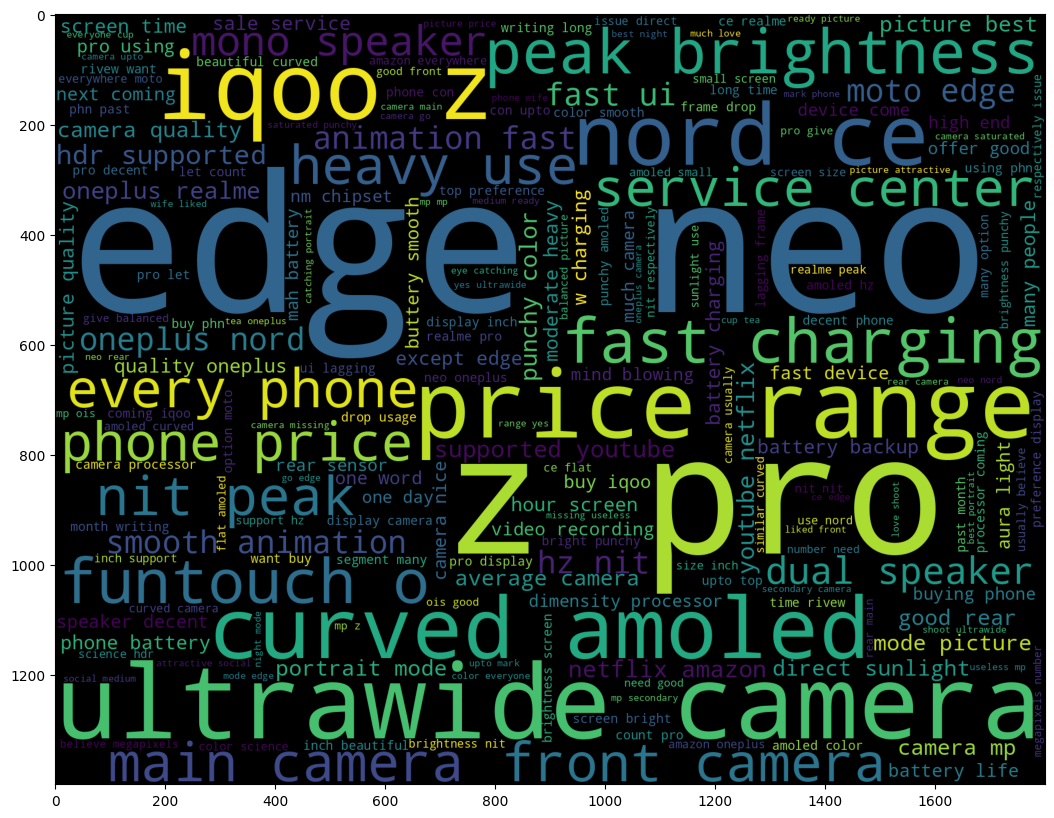

In [104]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

# **A. Most common words in positive Review**

In [109]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap="Dark2").generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

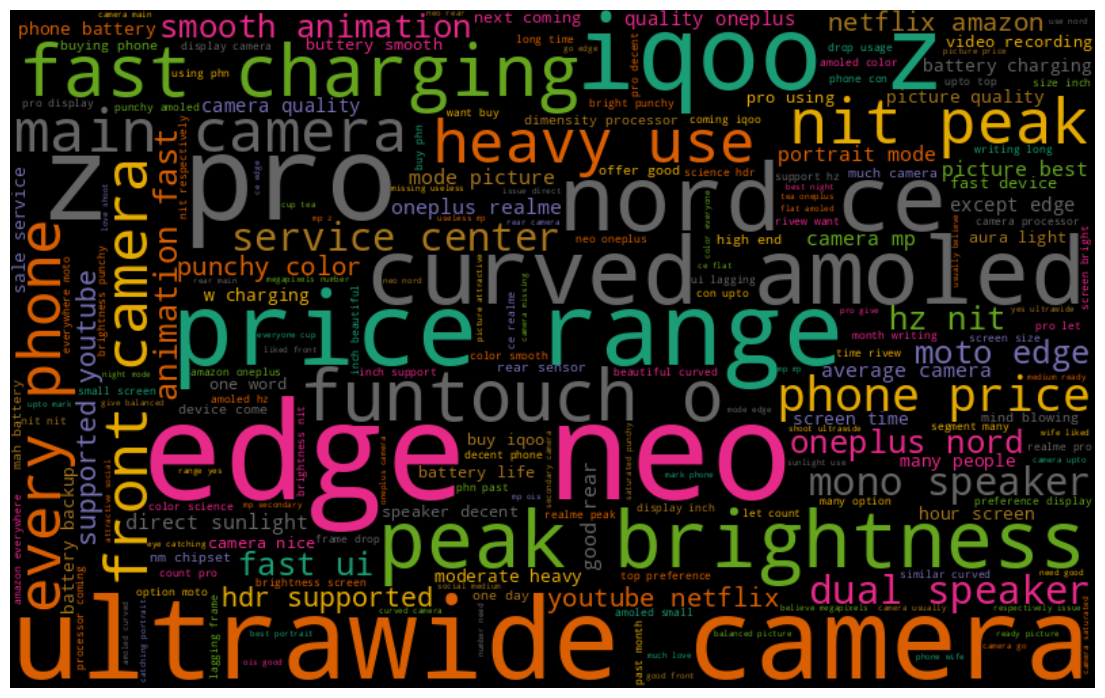

In [113]:
all_words = " ".join([text for text in dataframe["Clean_Reviews"][dataframe.sentiment == "pos"]])
generate_wordcloud(all_words)